# DATA620: Assignment 6

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Assignment
For this assignment, we will be working with Davis Southern Club Women network dataset obtained from a previously collected data by Davis et al in 1930s. It represent observed attendance of 18 southern women at 14 social events. It's a simple 2-node network.

* [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)
* [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
* [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

The objective of this week's assignment is:

* Load a dataset
* Create basic analysis
* Explore the relationship between (1) the women, and (2) the social events

<br>

### Overview

One of the first two-mode datasets to be analysed was the Davis’ Southern Women dataset (Davis et al., 1941), which recorded the attendance of a group of women (primary node set) to a series of events (secondary node set). A woman would be linked to an event if she attended it. This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

<br>

### Backbround
In the 1930s, five ethnographers, Allison Davis, Elizabeth Stubbs Davis, Burleigh B. Gardner, Mary R. Gardner and J. G. St. Clair Drake, collected data on stratification in Natchez, Mississippi (Warner, 1988, p. 93). They produced the book that reported a comparative study of social class in black and in white society. One element of this work involved examining the correspondence between people's social class levels and their patterns of informal interaction. Davis et. al was concerned with the issue of how much the informal contacts made by individuals were established solely (or primarily) with others at approximately their own class levels. To address this question the authors collected data on social events and examined people's patterns of informal contacts.

In particular, they collected systematic data on the social activities of 18 women whom they observed over a nine-month period. During that period, various subsets of these women had met in a series of 14 informal social events. The participation of women in events was uncovered using “interviews, the records of participant observers, guest lists, and the newspapers” (Davis et al., p. 149). Homans (1950, p. 82), who presumably had been in touch with the research team, reported that the data reflect joint activities like, “a day's work behind the counter of a store, a meeting of a women's club, a church supper, a card party, a supper party, a meeting of the Parent-Teacher Association, etc.


<br>

### Approach:
* Load the Graph from NetworkX as a Bipartite Graph
* Analyze the Network
* Project the Graph on the Nodes for Women
    * Analyze Measures of Centrality
    * Analyze the weighted graph
    * Use the Island Method to Trim the Graph
* Project the Graph on the Nodes for Events
    * Analyze Measures of Centrality
    * Analyze the weighted graph
    * Use the Island Method to Trim the Graph
* Detail Conclusion


<br>

### Setup

In [22]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from networkx import algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import networkx.algorithms.bipartite as bipartite
import warnings
warnings.filterwarnings("ignore")

<br>

### Load the Graph
The graph can be loaded from the Networkx packages. The davis_southern_women_graph() method in Networkx generates the Bipartite Networkx with both Women and Event nodes. By convention the 'top' and 'bottom' of the Graph object will return a single type of node. 

In [23]:
# Import data
G = nx.davis_southern_women_graph()

# Store the women and event specific graphs
women = G.graph["top"]
events = G.graph["bottom"]

<br>
The naive rendering of the graph illustrates a fully connected graph but provides limited additional information about the network structure. 

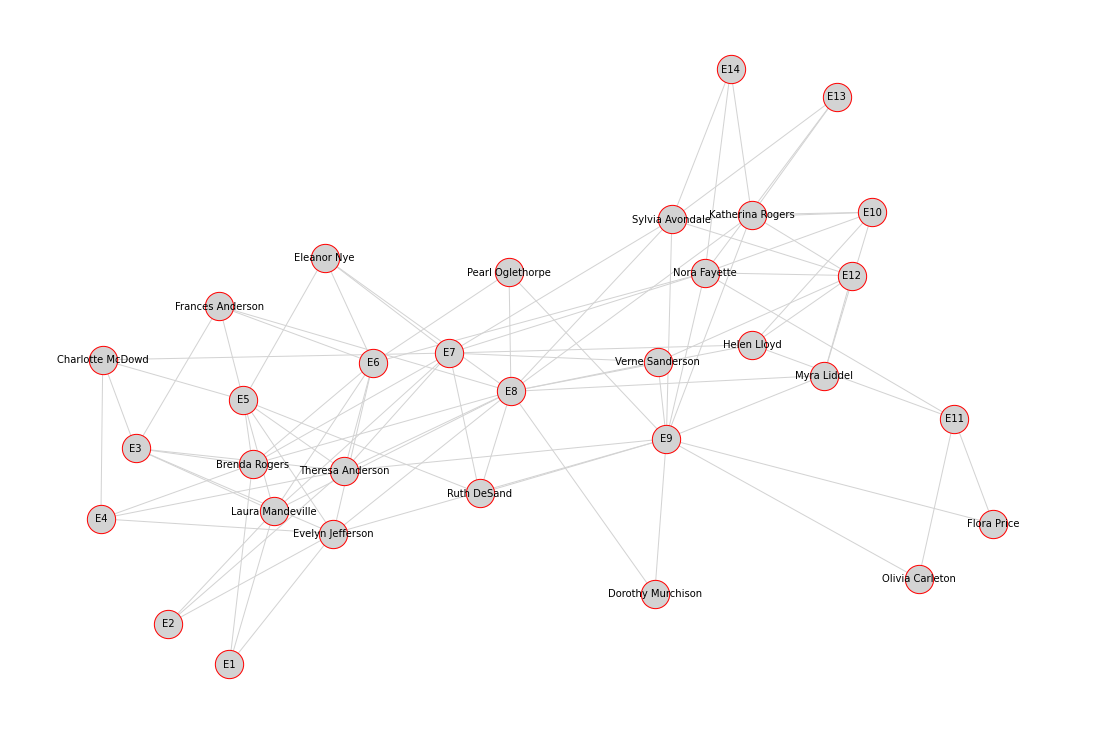

In [24]:
pos = nx.spring_layout(G)
plt.figure(1,figsize=(15,10)) 
nx.draw(G, with_labels = True, node_size = 800, font_color = 'black', font_size=10,
        edge_color='lightgray', edgecolors='red', node_color='lightgray')

<br>
The addition of color for the different types of nodes (Women or Event) and using size to reflection centrality highlights some high level patterns. The event nodes will be highlighted in green and the women nodes will be gray. The size of the node will indicate the connectivity of the specific node as measure by the degrees function.

* first we calculate the degrees for women and events
* then we render the Women nodes and the Event nodes using the degree measure for size
* then we draw the edges
* finally add labels to the Graph


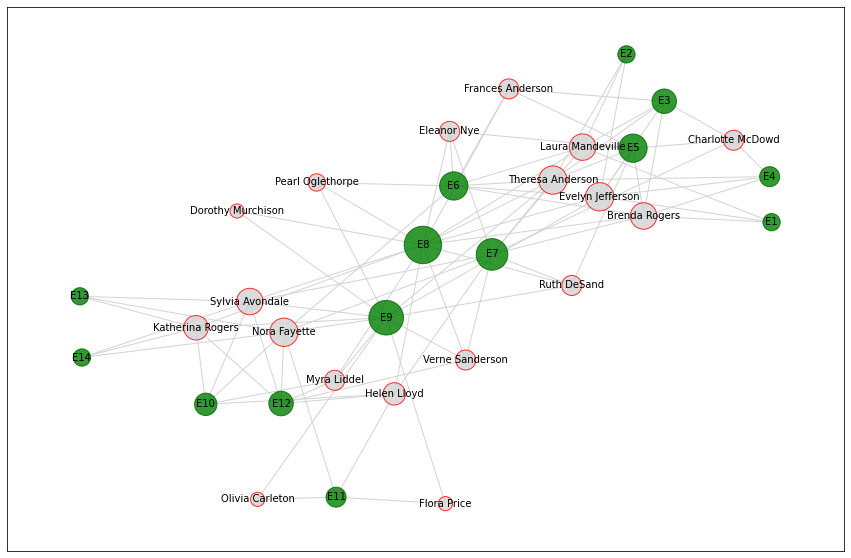

In [25]:
# gnerate the degress for Women and Events
womenDegree = nx.degree(G, women) 
eventDegree = nx.degree(G, events)

# graph setup
pos = nx.spring_layout(G)
plt.figure(figsize = (15,10))


# draw women nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=list(women),
                       node_color='lightgray',
                       edgecolors='red',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                       alpha=0.8)

# draw Event nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=list(events),
                       node_color='green',
                       edgecolors='darkgreen',
                       node_size=[v * 100 for v in dict(eventDegree).values()],
                       alpha=0.8)

# draw edges
nx.draw_networkx_edges(G, pos,
                       edge_color='lightgray',
                      )

# add labels to graph
dump = nx.draw_networkx_labels(G, pos, font_size=10)

In [26]:
sorted(dict(eventDegree).items(),key=lambda item: item[1],reverse=True)[:5]

[('E8', 14), ('E9', 12), ('E7', 10), ('E5', 8), ('E6', 8)]

The visualization of the graph highlights several central events. If we create a sorted dictionary of event nodes using the degree measure of centrality as the sort key we can see the primary events are:

* Central Event E8, E9, E6, E7, and E5
* Periphery Events E11, E1 and E2 - appear to be smaller events with limited attendance. 

<br>
We can also observe some clustering of the women nodes. These groups roughly include:

* Group 1 Evelyn Jefferson, Theresa Anderson,Brenda Rogers, Laura Mandeville, Frances Anderson
* Group 2 consists of Katherina Rogers, Nora Fayette, Sylvia Avondale

<br>
This view provides some limited insights into the structure of the Network however there is still some ambiguity that we will explore with additional analysis. 


<br><br>
### Analysis of Bipartite Graph (Women Projection)
Projection is used to analyze the centrality measures for the Davis Southern Club Women network. We will use degree, closeness, betweenes and eigenvectors centrality measures to assess the relative importance of each Women node to the network

* First, we will project the graph onto the women node
* Calculate degree, closeness, betweenness and eigenvectors centrality for the graph
* Identify the nodes with higher centrality measures

In [27]:
# project graph
W = bipartite.weighted_projected_graph(G, women)

### Measures of Centrality


In [28]:
# calculate measures of centrality
deg = nx.degree(W)
c = nx.closeness_centrality(W)
b=nx.betweenness_centrality(W)
e = nx.eigenvector_centrality(W, max_iter=100) 

df = pd.DataFrame(women, columns=['name'])

df['Degree'] = df['name'].map(dict(deg))
df['Closeness'] = df['name'].map(dict(c))
df['Betweenness'] = df['name'].map(dict(b))
df['Eigenvector'] = df['name'].map(dict(e))

In [29]:
df[df['Degree'] >= 17].sort_values('Degree',ascending=False, inplace=False).round(decimals=4)

,name,Degree,Closeness,Betweenness,Eigenvector
0,Evelyn Jefferson,17,1.0,0.0101,0.2535
2,Theresa Anderson,17,1.0,0.0101,0.2535
8,Ruth DeSand,17,1.0,0.0101,0.2535
9,Verne Sanderson,17,1.0,0.0101,0.2535
12,Sylvia Avondale,17,1.0,0.0101,0.2535
13,Nora Fayette,17,1.0,0.0101,0.2535
14,Helen Lloyd,17,1.0,0.0101,0.2535


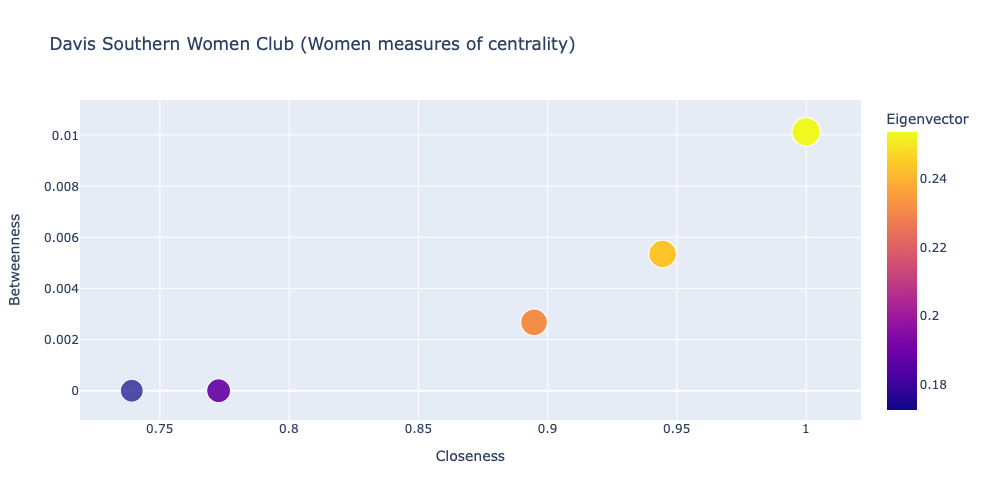

In [30]:
fig = px.scatter(df, x="Closeness", y="Betweenness", size="Degree", color="Eigenvector", 
                    hover_name="name", width=800, height=500, title="Davis Southern Women Club (Women measures of centrality)")
fig.show()

Unsurprisingly the same group of women measure the highest in each of the centrality measures.
* Evelyn Jefferson	
* Theresa Anderson	
* Ruth DeSand
* Verne Sanderson
* Sylvia Avondale
* Nora Fayette
* Helen Lloyd	

Measures of Centrality
* Degree centrality - The 7 women listed above each had 17 connections to other women in the social club
* Closeness centrality - The 7 women listed above each had a 1 for the closeness centrality measure
* Betweenness centrality - The 7 women listed above each had a betweenness measure of 0.0101
* Eigenvector - The 7 women listed above each had an eigenvector measure of 0.2535

<br>

### Projected Graph

When we apply weights to the edges of the projected graph you can start to see some patterns in the data. The outline of 2 cliques starts to emerge. 

In [31]:
pos_W =nx.spring_layout(W)
weights_W=[edata['weight'] for f,t,edata in W.edges(data=True)]

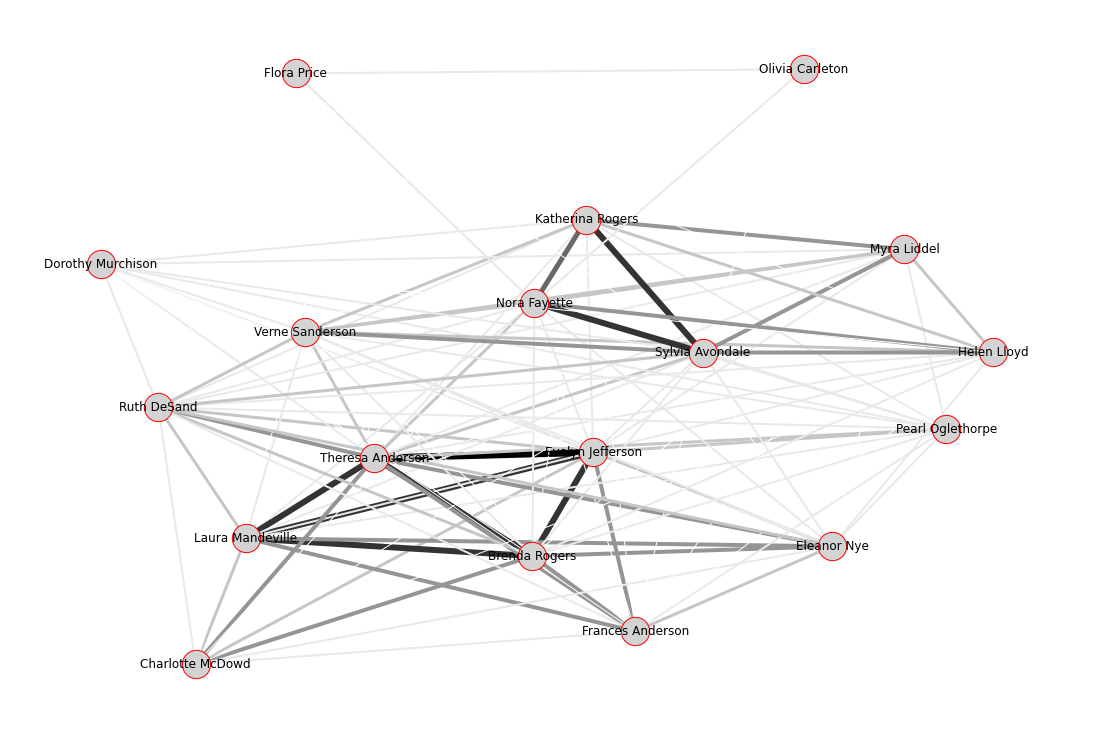

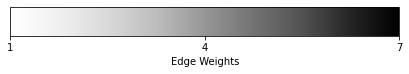

In [32]:
plt.figure(1,figsize=(15,10)) 

nx.draw(W, pos=pos_W, 
        with_labels=True, node_size = 800, node_color='lightgray', edgecolors='red',
        font_color='black', font_size=12,
        width=weights_W, edge_color=weights_W, edge_cmap=mpl.cm.Greys)


# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=plt.cm.Greys,
                               norm=mpl.colors.Normalize(1,7),
                               ticks=[1, 4, 7],
                               label='Edge Weights')

<br>
The weighted graph highlights 2 distinct groups

* group 1 - Katherina Rogers, Myra Liddel, Nora Fayette, Sylvia Avondale, Helen Lloyd, Verne Sanderson
* group 2 - Theresa Anderson, Evelyn Jefferson, Brenda Rogers, Laura Mandeville, Ruth DeSand, Eleanor Nye, Charlotte McDowd, Frances Anderson

<br><br>
### Bipartite Network Graph Reduction 
Using the Island Method we can reduce the graph to its primary edges. By filtering the edge weights to include only the edges with more then weight of 3. The 2 cliques become visible.

In [33]:
# variable for the target weight
filter_weight = 3

# filtered graph initialized with all nodes
filter_g = nx.Graph()
filter_g.add_nodes_from(W.nodes(data=True))

# add the edges that meet the weight criteria
for source, target, attr in W.edges(data=True):
    if attr['weight'] > filter_weight:
        filter_g.add_edge(source,target, **attr)

# add the edge attributes        
edge_labels = nx.get_edge_attributes(filter_g, 'weight')

# generate the weighted data
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]

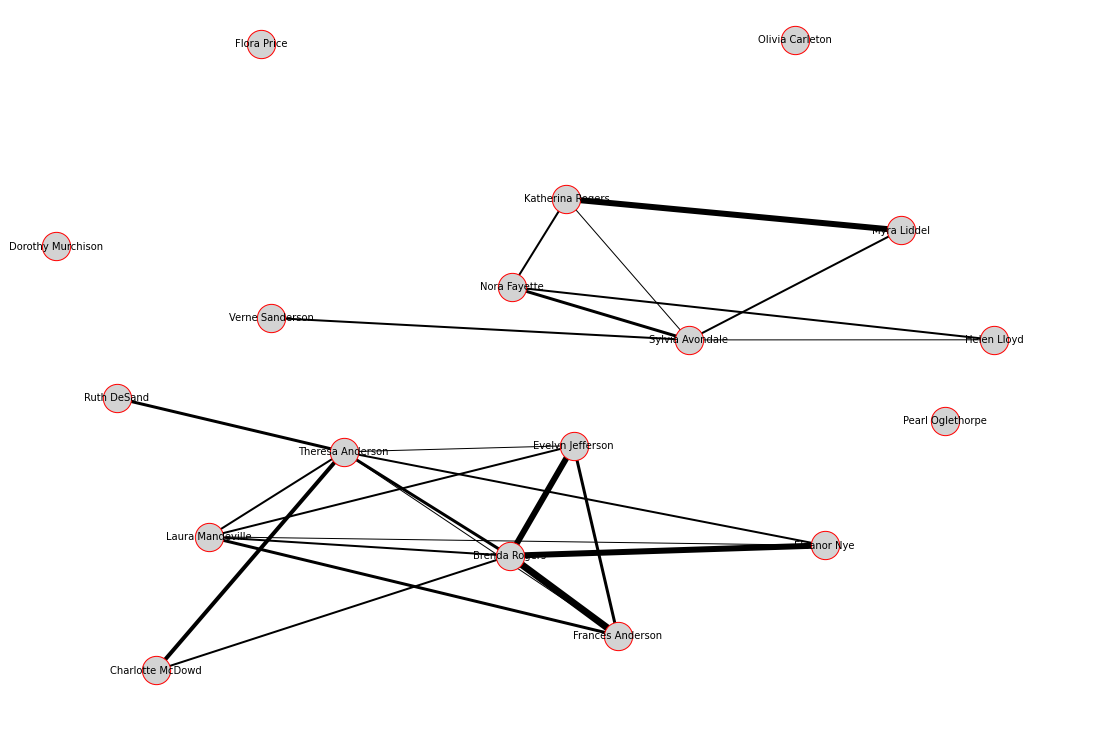

In [34]:
# plot the resulting filtered graph
plt.figure(figsize = (15,10))
nx.draw(filter_g, pos=pos_W, 
        with_labels=True, node_size = 800, node_color='lightgray', edgecolors='red',
        font_color='black', font_size=10,
        edge_cmap=mpl.cm.Greys, width=weights, edge_vmin=0, edge_vmax=20)


<br>
The 2 cliques identified include 14 women with 4 Outliers:

* Cliques 1 - Katherina Rogers, Myra Liddel, Nora Fayette (17), Sylvia Avondale (17), Helen Lloyd (17), Verne Sanderson (17)
* Cliques 2 - Theresa Anderson (17), Evelyn Jefferson (17), Brenda Rogers, Laura Mandeville, Ruth DeSand (17), Eleanor Nye, Charlotte McDowd, Frances Anderson
* Outliers - Pearl Oglethorpe, Dorothy Murchison, Olivia Carleton, Flora Price

The cliques consist of women with high measures degree centrality. The women in the outlier group include women with lower degrees of centrality with the exception of Pearl Oglethorpe and Dorothy Murchison

<br><br>
### Analysis of Bipartite Graph (Events Projection)

Projection is used to analyze the centrality measures for the Davis Southern Club Women network. We will use degree, closeness, betweenness and eigenvectors centrality measures to assess the relative importance of each Event node to the network

* First, we will project the graph onto the Event node
* Calculate degree, closeness, betweenness and eigenvectors centrality for the graph
* Identify the nodes with higher centrality measures

In [35]:
# Project Graph
E = bipartite.weighted_projected_graph(G, events)

### Measures of Centrality

In [36]:
# Calculate Measures of Centraltiy
deg = nx.degree(E)
c = nx.closeness_centrality(E)
b=nx.betweenness_centrality(E)
e = nx.eigenvector_centrality(E, max_iter=100) 

e_df = pd.DataFrame(events, columns=['name'])

e_df['Degree'] = e_df['name'].map(dict(deg))
e_df['Closeness'] = e_df['name'].map(dict(c))
e_df['Betweenness'] = e_df['name'].map(dict(b))
e_df['Eigenvector'] = e_df['name'].map(dict(e))

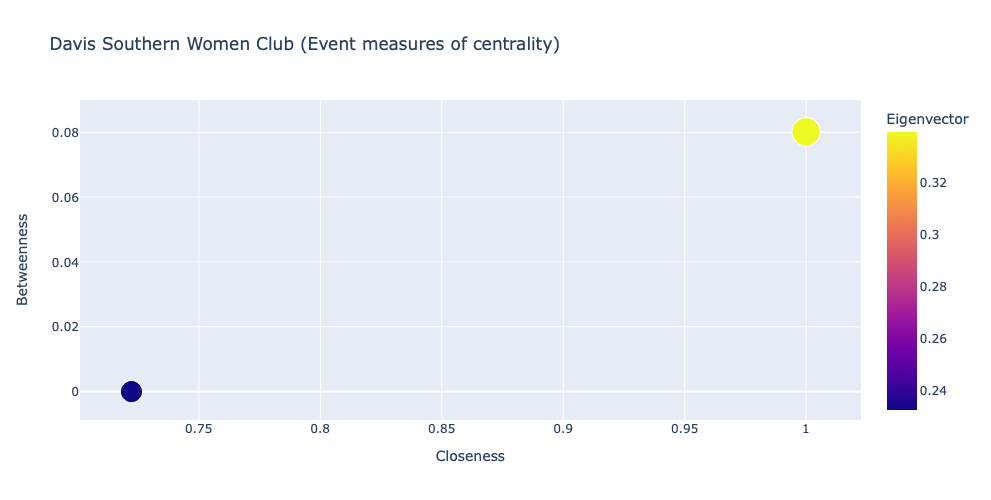

In [37]:
fig = px.scatter(e_df, x="Closeness", y="Betweenness", size="Degree", color="Eigenvector", 
                    hover_name="name", width=800, height=500, title="Davis Southern Women Club (Event measures of centrality)")
fig.show()

<br>
The degree of centrality measure for Event fall into 2 buckets 13 and 8. The top level Events include E6, E7, E8, and E9.

In [38]:
e_df[e_df['Degree'] >= 13].sort_values('Degree',ascending=False, inplace=False).round(decimals=4)

,name,Degree,Closeness,Betweenness,Eigenvector
5,E6,13,1.0,0.0801,0.3393
6,E7,13,1.0,0.0801,0.3393
7,E8,13,1.0,0.0801,0.3393
8,E9,13,1.0,0.0801,0.3393


<br>

### Projected Graph

When we apply weights to the edges of the projected graph you can start to see some patterns in the data. There is central group of events with a higher degree measurements.

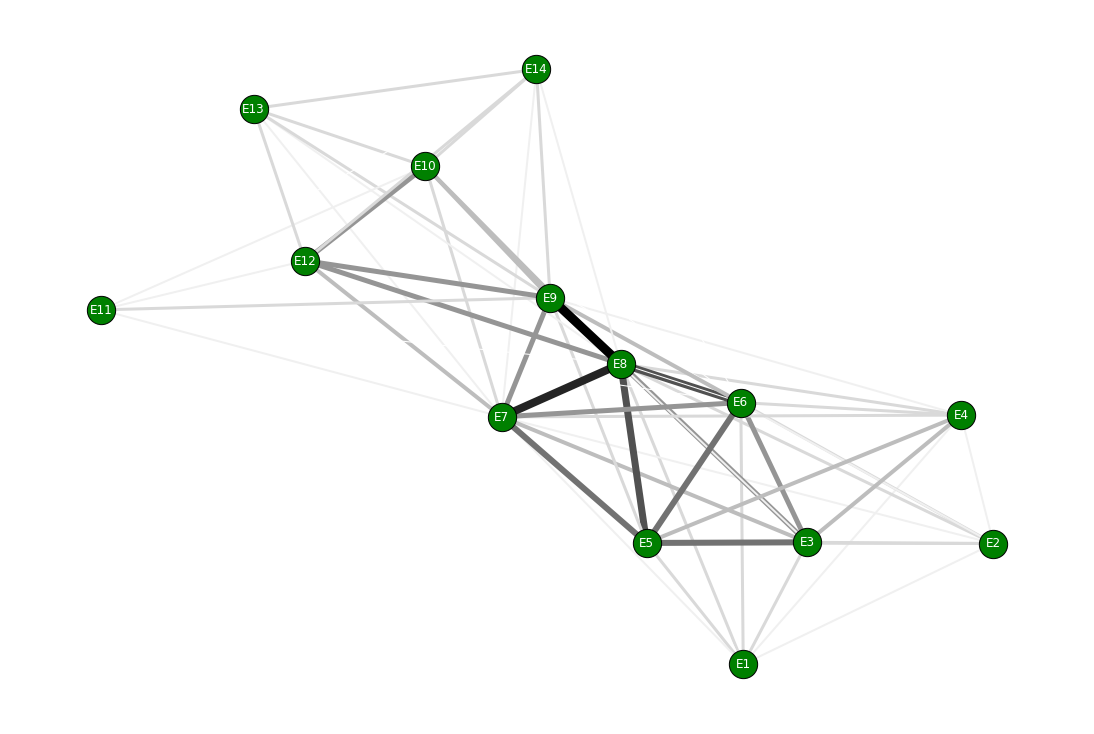

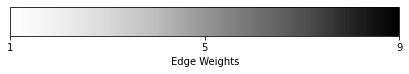

In [39]:
# graph setup
plt.figure(1,figsize=(15,10))
pos_E = nx.spring_layout(E)

# calculate the edge weights
weights_E=[edata['weight'] for f,t,edata in E.edges(data=True)]

nx.draw(E, pos=pos_E, 
        with_labels=True, node_size = 800, node_color='green', edgecolors='black',
        font_color='white', font_size=12,
        width=weights_E, edge_color=weights_E, edge_cmap=mpl.cm.Greys)


# create the Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=plt.cm.Greys,
                               norm=mpl.colors.Normalize(1,9),
                               ticks=[1, 5, 9],
                               label='Edge Weights')

<br><br>
### Bipartite Network Graph Reduction 
Using the Island Method we can reduce the graph to its primary edges. By filtering the edge weights to include only the edges with more then weight of 5. The primary cluster of events becomes more visible.

In [40]:
# variable for the target weight
filter_weight_E = 5

# filtered graph initialized with all nodes
filter_event_g = nx.Graph()
filter_event_g.add_nodes_from(E.nodes(data=True))

# add the edges that meet the weight criteria
for source, target, attr in E.edges(data=True):
    if attr['weight'] > filter_weight_E:
        filter_event_g.add_edge(source,target, **attr)
        
# add the edge attributes 
edge_labels = nx.get_edge_attributes(filter_event_g, 'weight')

# generate the weighted data
weights_E=[edata['weight'] for f,t,edata in E.edges(data=True)] 

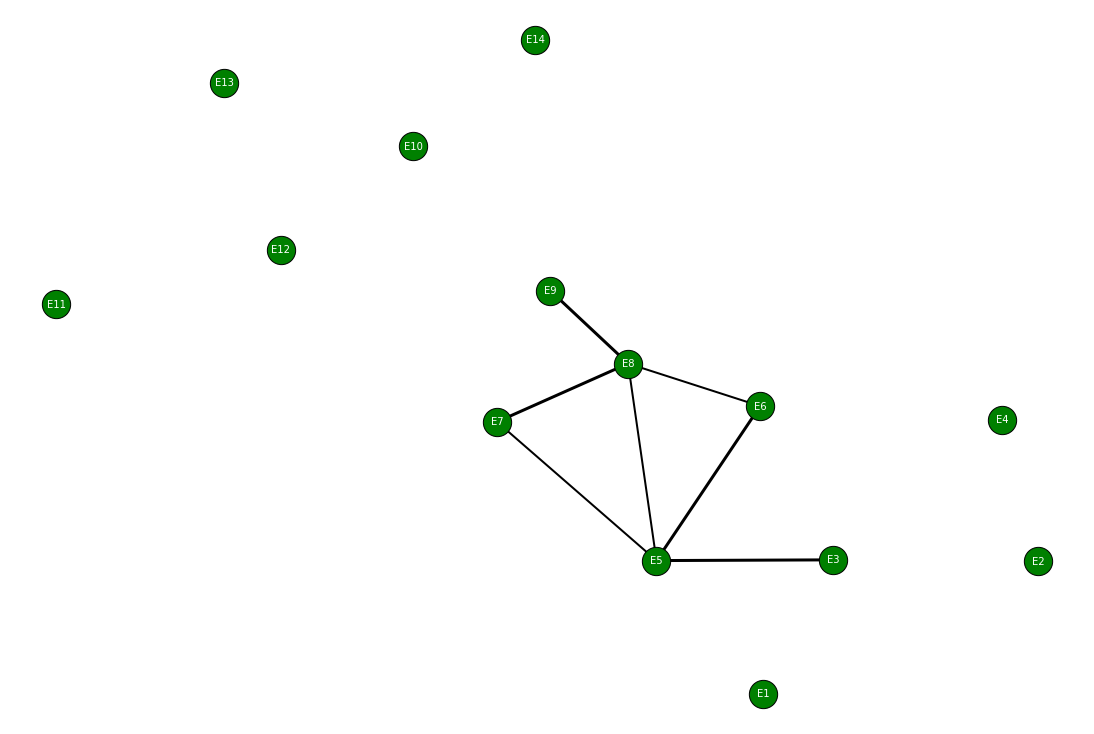

In [41]:
# plot the resulting filtered graph
plt.figure(figsize = (15,10))
nx.draw(filter_event_g, pos=pos_E, 
        with_labels=True, node_size=800, node_color='green', edgecolors='black',
        font_color='white', font_size=10,
        edge_cmap=mpl.cm.Greys, width=weights_E, edge_vmin=0, edge_vmax=20)


<br>
A single cluster of 6 events emerges when you filter the edges with weights above 5. 

* cluster 1 - E3, E5, E7 (13), E8 (13), E6 (13), and E9 (13)

The cluster consist of Events with high degree centrality measures with the exception of E3, and E5.



<br>

### Conclusion

The measures of centrality were consistent across both Event and Women projected graphs. The Events and Women had high centrality measures across the board. Measurement of degrees, closeness, betweenness and the eigenvector were consistent. The visualizations of the graph outlined and the island graph reduction methods identified 2 cliques in the case of Women projection graph and on central cluster in the Event projected graph. 

The four most popular Events in the network are clearly E6, E7, E8, E9 and thus have the greatest reach. Therefore, if we wanted to get a message to all women, we should use these three Events to broadcast. Even though Event E6 has eight members, its centralities are high. 

We can conclude that the most connected people in the network are women who have attended these Events. And even though members like Ruth and Verne are only attended 4 Events, their degree centrality and closeness centrality are very high. 